In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.0333 mT/s (1500 s). Then we are Analyzing the output data of Script-1.2.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-1.2"

In [3]:
slope = 50/1500
slope

0.03333333333333333

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_50mT-1500s_higherHill_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_50mT-1500s_higherHill_l10_exp8.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp4.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp2.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp3.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp7.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp5.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp6.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp9.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp1.dat
ACI_CairoLattice_50mT-1500s_higherHill_l10_exp0.dat


In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      25    301.104439 -301.304550             4      -4  0.000000   
           28    704.625685 -417.196014             3      -1  2.000000   
           47    440.070723 -115.898809             4      -2 -1.000000   
           48    347.420541 -115.904316             4       2 -1.000000   
           49    324.265015 -102.505692             3      -1  1.732051   
...                     ...         ...           ...     ...       ...   
9   150000 1199  426.684724 -602.604004             3      -1 -1.000000   
           1200  416.911987 -566.024860             3       1  0.000000   
           1202  175.521088  -92.704002             3       1 -1.000000   
           1203  195.066852  -92.704002             3       1 -2.000000   
           1205  787.500000 -731.857662             3      -1  1.732051   

                       dy  
Exp frame  id              
0   0      25    0.000000  
           28    0.000000  
           47   -1.732051  
           48   -1.732051  
           49    1.000000  
...                   ...  
9   150000 1199  1.732051  
           1200  2.000000  
           1202  1.732051  
           1203  0.000000  
           1205 -1.000000  

[1020760 rows x 6 columns]

In [8]:
Cairo_exp['field'] = (Cairo_exp.index.get_level_values('frame'))/100*slope

## 1. Total topological charge

In [9]:
Topo_q = Cairo_exp.groupby('field').sum()/Cairo_exp.groupby('field').count()

In [10]:
Topo_q

,x,y,coordination,charge,dx,dy
field,,,,,,
0.000000,447.795505,-424.89281,3.33284,0.003254,0.030507,0.001582
0.333333,447.795505,-424.89281,3.33284,0.003254,0.031611,0.000694
0.666667,447.795505,-424.89281,3.33284,0.002959,0.031275,0.003484
1.000000,447.795505,-424.89281,3.33284,0.002959,0.032971,0.002755
1.333333,447.795505,-424.89281,3.33284,0.003254,0.034331,0.003494
...,...,...,...,...,...,...
48.666667,447.795505,-424.89281,3.33284,-0.004142,0.017844,-0.008667
49.000000,447.795505,-424.89281,3.33284,-0.007692,0.008668,-0.005605
49.333333,447.795505,-424.89281,3.33284,-0.001183,0.024836,0.002550


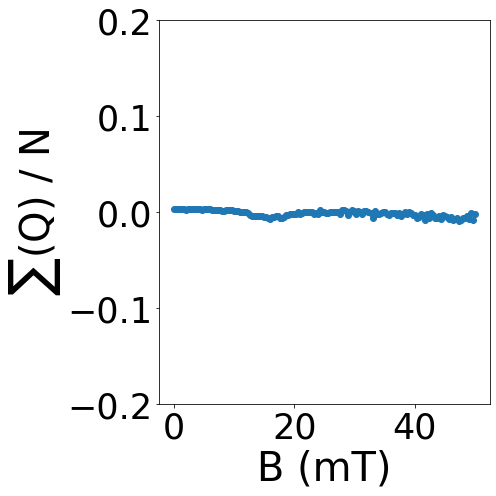

In [11]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('field'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [12]:
Cairo_exp.groupby(['field','coordination']).sum()


x             y  charge          dx  \
field     coordination                                                   
0.000000  3             2.036935e+06 -1.881481e+06     114   89.621784   
          4             9.901629e+05 -9.907940e+05     -92  116.602541   
0.333333  3             2.036935e+06 -1.881481e+06     116   95.353834   
          4             9.901629e+05 -9.907940e+05     -94  118.334591   
0.666667  3             2.036935e+06 -1.881481e+06     114   95.085884   
...                              ...           ...     ...         ...   
49.333333 4             9.901629e+05 -9.907940e+05    1314   33.052562   
49.666667 3             2.036935e+06 -1.881481e+06   -1250  155.765379   
          4             9.901629e+05 -9.907940e+05    1196   74.837177   
50.000000 3             2.036935e+06 -1.881481e+06   -1288   91.052562   
          4             9.901629e+05 -9.907940e+05    1272   -0.392300   

                               dy  
field     coordination             
0.000000  3            -35.947443  
          4             46.641016  
0.333333  3            -40.947443  
          4             45.641016  
0.666667  3            -31.019240  
...                           ...  
49.333333 4            -16.856406  
49.666667 3              3.162832  
          4            -85.373081  
50.000000 3             41.182098  
          4            -12.105103  

[302 rows x 5 columns]

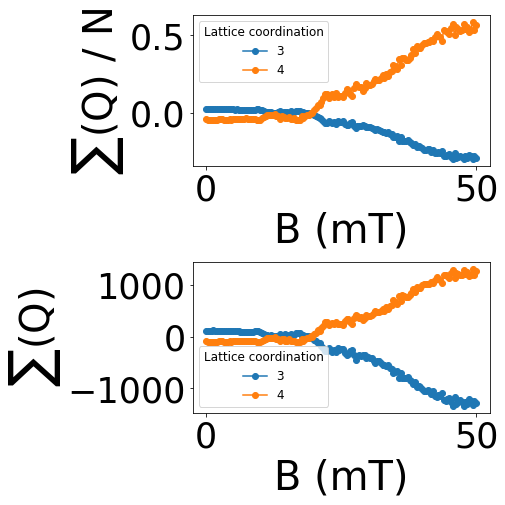

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(7,7))

Sep_charge_tot = Cairo_exp.groupby(['field','coordination']).sum()

Sep_charge = Cairo_exp.groupby(['field','coordination']).sum()/Cairo_exp.groupby(['field','coordination']).count()

for typ_m, mtype in Sep_charge.groupby('coordination'):
    
    ax[0].plot(mtype.index.get_level_values("field"), mtype["charge"],'-o', label = typ_m)
    
for typ_m, mtype in Sep_charge_tot.groupby('coordination'):
    
    ax[1].plot(mtype.index.get_level_values("field"), mtype["charge"],'-o', label = typ_m)

    
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=35) 
ax[0].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax[0].set_xlabel('B (mT)', size = 40)
ax[0].set_ylabel('$\sum$(Q) / N', size = 40)

ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=35)  

ax[1].legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)
ax[1].set_xlabel('B (mT)', size = 40)
ax[1].set_ylabel('$\sum$(Q)', size = 40)


plt.tight_layout()

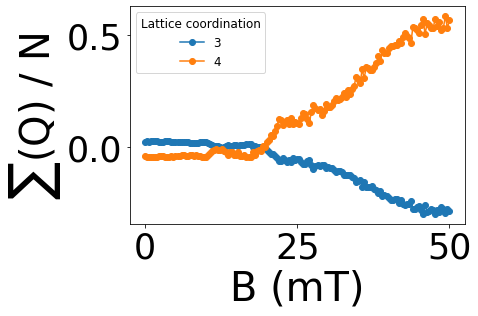

In [23]:
for typ_m, mtype in Sep_charge.groupby('coordination'):
    
    plt.plot(mtype.index.get_level_values("field"), mtype["charge"],'-o', label = typ_m)

plt.tick_params(axis='y', labelsize=35)
plt.tick_params(axis='x', labelsize=35) 
plt.xticks([0,25,50])
plt.xlabel('B (mT)', size = 40)
plt.ylabel('$\sum$(Q) / N', size = 40)
plt.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)